<a href="https://colab.research.google.com/github/assafmilner/Deep-Learning-Final-Project/blob/main/FinalVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 **Deep Learning Final Project**

## 🧑‍🎓 **Student Details:**
- **Daniel Ladiginsky**
- **Assaf Milner**

 🎯 **Project Title:**
**Sentiment Analysis on Product Reviews Using Deep Learning**

## 📝 **Problem Description:**
We aim to develop a deep learning model to classify sentiment in product reviews as **Positive**, **Negative**, or **Neutral**. The model will analyze text data to understand customer satisfaction and highlight trends.

## 🗂️ **Dataset:**
- **Source:** Kaggle: [Amazon Fine Food Reviews Dataset](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)  
- **Description:** A dataset containing over **500,000** customer reviews with sentiment labels.

## 🛠️ **Model Architecture:**
- **Framework:** PyTorch / TensorFlow  
- **Model Type:** Transformer-based architecture (e.g., BERT)  
- **Preprocessing:** Tokenization, Stop-Word Removal, Word Embeddings

## 📊 **Evaluation Metrics:**
- **Accuracy**  
- **Precision, Recall, F1-Score**  
- **Confusion Matrix**

# 📚 **Deep Learning Final Project**

## 📝 **Problem Selection:**
We aim to develop a deep learning model to classify sentiment in product reviews as **Positive**, **Negative**, or **Neutral**. The model will analyze text data to understand customer satisfaction and highlight trends.

## 🗂️ **Dataset Collection/Preparation:**
- **Source:** Kaggle: [Amazon Fine Food Reviews Dataset](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)  
- **Description:** A dataset containing over **500,000** customer reviews with sentiment labels.

### 🗂️ **Dataset Collection:**

In this stage, we import all the necessary libraries for our project. This includes libraries for data processing (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), text processing (`re`, `spacy`), machine learning tools (`sklearn`), and advanced transformer models (`transformers`, `torch`) for the model we will build later.

Next, we load the dataset (`Reviews.csv`), which contains user reviews, including all the main fields needed for sentiment analysis.

We then perform some basic checks on the dataset:
- Display general info about the dataframe (`info`)
- Show descriptive statistics (`describe`)
- Peek at the first few rows (`head`)
- Check uniqueness of columns (`nunique`)

**Goal of this stage:**  
To understand the structure of the data and ensure it is loaded correctly, before moving on to preprocessing and cleaning.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import train_test_split
import spacy
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
reviews_df = pd.read_csv('/content/drive/MyDrive/Reviews.csv', index_col = 0)

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568454 entries, 1 to 568454
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568428 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   Summary                 568427 non-null  object
 8   Text                    568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


In [ ]:
reviews_df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,1.743817,2.22881,4.183199,1.296257e+09
std,7.636513,8.28974,1.310436,4.804331e+07
min,0.000000,0.00000,1.000000,9.393408e+08
25%,0.000000,0.00000,4.000000,1.271290e+09
50%,0.000000,1.00000,5.000000,1.311120e+09
75%,2.000000,2.00000,5.000000,1.332720e+09
max,866.000000,923.00000,5.000000,1.351210e+09


In [ ]:
reviews_df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
reviews_df.nunique()

,0
ProductId,74258
UserId,256059
ProfileName,218415
HelpfulnessNumerator,231
HelpfulnessDenominator,234
Score,5
Time,3168
Summary,295742
Text,393579


### 🗂️ **Dataset Preparation:**

In this section, we prepare the dataset for training by cleaning and filtering the data.  
We remove noisy or irrelevant entries, eliminate duplicates, and create meaningful sentiment labels from the original scores.  
These steps are crucial for ensuring high-quality input for our model.


#### Data Cleaning: Removing Inconsistent User Profiles

Some users in the dataset appear under multiple profile names, which may indicate data duplication or manipulation. To ensure data integrity, we remove all users associated with more than one profile name, and then drop the 'ProfileName' column as it no longer provides unique information.



In [ ]:
user_id_profile_names_df = reviews_df.groupby('UserId')['ProfileName'].nunique()
user_id_with_different_profile_names = user_id_profile_names_df[user_id_profile_names_df > 1]

user_id_with_different_profile_names.head()

print("We will remove all users with multiple profileNames total" , user_id_with_different_profile_names.sum(), "rows")

reviews_df = reviews_df[~reviews_df.UserId.isin(user_id_with_different_profile_names.index)]

We will remove all users with multiple profileNames total 100 rows


In [ ]:
# This provides the same information as userId in this point
reviews_df.drop('ProfileName', axis=1, inplace=True)

<ipython-input-9-fab37740ba1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.drop('ProfileName', axis=1, inplace=True)


#### Removing Duplicate Reviews and Irrelevant Columns

To further reduce noise, we remove users who posted multiple reviews at the same time with identical text. We then drop the 'UserId' and 'Time' columns, as they no longer contribute useful information for sentiment analysis.


In [ ]:
# Check for users posting multiple reviews at the same time with the same text
duplicate_reviews = reviews_df.groupby(['UserId', 'Time', 'Text']).size()

# Filter for cases where the same UserId posted multiple reviews at the same timestamp
multiple_reviews_same_time = duplicate_reviews[duplicate_reviews > 1]

In [ ]:
# show that there are multiple reviews in the same time which creates dups in out dataset

reviews_df[reviews_df.UserId.isin(multiple_reviews_same_time.index.get_level_values(0).unique())].sort_values('UserId')

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,
180872,B007Y59HVM,#oc-R115TNMSPFT9I7,2,3,2,1331510400,"""Green"" K-cup packaging sacrifices flavor",Overall its just OK when considering the price...
83318,B005ZBZLT4,#oc-R115TNMSPFT9I7,2,3,2,1331510400,"""Green"" K-cup packaging sacrifices flavor",Overall its just OK when considering the price...
290948,B005HG9ESG,#oc-R11D9D7SHXIJB9,0,0,5,1342396800,Muscle spasms,"My wife has recurring extreme muscle spasms, u..."
455534,B005HG9ERW,#oc-R11D9D7SHXIJB9,0,0,5,1342396800,Muscle spasms,"My wife has recurring extreme muscle spasms, u..."
496894,B005HG9ET0,#oc-R11D9D7SHXIJB9,0,0,5,1342396800,Muscle spasms,"My wife has recurring extreme muscle spasms, u..."
...,...,...,...,...,...,...,...,...
404101,B003FDG4K4,AZZU1VEO8KUXH,1,1,5,1317513600,NOT like the others,I bought this for my 13 year old daughter who ...
231424,B003FDC2I2,AZZU1VEO8KUXH,1,1,5,1317513600,NOT like the others,I bought this for my 13 year old daughter who ...
294985,B005V9UG18,AZZU1VEO8KUXH,1,1,5,1317513600,NOT like the others,I bought this for my 13 year old daughter who ...


In [ ]:
reviews_df.drop_duplicates(subset=['UserId', 'Time', 'Text'], inplace=True)

reviews_df.drop(['UserId', 'Time'], axis=1, inplace=True)

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393710 entries, 1 to 568454
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               393710 non-null  object
 1   HelpfulnessNumerator    393710 non-null  int64 
 2   HelpfulnessDenominator  393710 non-null  int64 
 3   Score                   393710 non-null  int64 
 4   Summary                 393707 non-null  object
 5   Text                    393710 non-null  object
dtypes: int64(3), object(3)
memory usage: 21.0+ MB


We will drop Time column because timestamps are irrelevant for sentiment analysis

#### Filtering Under-Reviewed Products

To focus on products with substantial feedback and reduce statistical noise, we retain only products that have at least 100 reviews. This step helps ensure more reliable sentiment analysis results.


In [ ]:
print("keep only products which have at least 100 reviews will reduce noise from under-reviewed products")

reviews_df = reviews_df.groupby('ProductId').filter(lambda x: len(x) >= 100)

reviews_df.drop('ProductId', axis=1, inplace=True)

reviews_df.info()

keep only products which have at least 100 reviews will reduce noise from under-reviewed products
<class 'pandas.core.frame.DataFrame'>
Index: 70780 entries, 423 to 566869
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   HelpfulnessNumerator    70780 non-null  int64 
 1   HelpfulnessDenominator  70780 non-null  int64 
 2   Score                   70780 non-null  int64 
 3   Summary                 70779 non-null  object
 4   Text                    70780 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.2+ MB


In [ ]:
reviews_df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
Id,,,,,
423,0,0,4,Hard,"Great if you are cutting back on fat, they do ..."
424,0,0,5,Kettle potato chips: Fully loaded baked potato,I have never met a Kettle brand chip I did not...
425,0,0,5,"Fresh, Lightly-Spiced, Crunchy Kettle Chips. G...",After buying bags one at a time (at a hefty ma...
426,0,0,4,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b..."
427,0,0,4,"pretty good, could be better",Glad to find these in a one ounce size but the...


#### Dropping Helpfulness Columns

HelpfulnessNumerator : Number of users who indicated they found the review helpful.

HelpfulnessDenominator : Number of users who indicated whether they found the review helpful or not

The 'HelpfulnessDenominator' column does not add unique information, as its only purpose is to contextualize 'HelpfulnessNumerator', which can instead be analyzed directly or normalized. After basic exploration and visualization, both columns are dropped to simplify the dataset.


In [ ]:
reviews_df.drop('HelpfulnessDenominator', axis=1, inplace=True)

In [ ]:
reviews_df.HelpfulnessNumerator.value_counts()

,count
HelpfulnessNumerator,
0,43647
1,13369
2,5130
3,2437
4,1388
...,...
148,1
321,1
223,1


In [ ]:
print(f"Percentage of HelpfulnessNumerator values below 10: {(100 * len(reviews_df[reviews_df.HelpfulnessNumerator > 10]) / len(reviews_df)):.2f}%")

Percentage of HelpfulnessNumerator values below 10: 2.74%


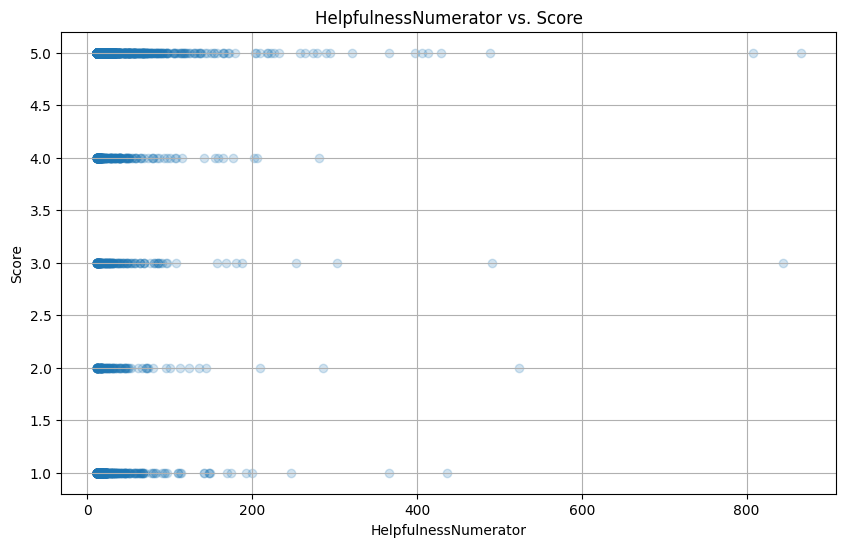

In [ ]:
nonzero_reviews_df = reviews_df[reviews_df.HelpfulnessNumerator > 10]

plt.figure(figsize=(10, 6))
plt.scatter(nonzero_reviews_df['HelpfulnessNumerator'], nonzero_reviews_df['Score'], alpha=0.2)
plt.title('HelpfulnessNumerator vs. Score')
plt.xlabel('HelpfulnessNumerator')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [ ]:
reviews_df.drop('HelpfulnessNumerator', axis=1, inplace=True)

In [ ]:
reviews_df.head()

,Score,Summary,Text
Id,,,
423,4,Hard,"Great if you are cutting back on fat, they do ..."
424,5,Kettle potato chips: Fully loaded baked potato,I have never met a Kettle brand chip I did not...
425,5,"Fresh, Lightly-Spiced, Crunchy Kettle Chips. G...",After buying bags one at a time (at a hefty ma...
426,4,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b..."
427,4,"pretty good, could be better",Glad to find these in a one ounce size but the...


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70780 entries, 423 to 566869
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Score    70780 non-null  int64 
 1   Summary  70779 non-null  object
 2   Text     70780 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [ ]:
# check duplicated data
reviews_df[reviews_df.duplicated()]

,Score,Summary,Text
Id,,,
604,5,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
19705,5,My son loves this,My son loves this food. He is 16 months now a...
20346,1,Warning: Contains Menadione,"According to the manufacturer's website, this ..."
83679,4,Compared to other dark or bold brews...,"Like many others, the price point of this coff..."
92354,1,Poor substitute,Save yourself from trying these k-cups - not a...
147593,5,How Could You Be So Bold,"After FINALLY purchasing <a href=""http://www.a..."
147760,5,How Could You Be So Bold,"After FINALLY purchasing <a href=""http://www.a..."
169235,5,New Review!,I like this item B0001ES9FI very much You shou...
180683,5,Delicious!,"I didn't like tea very much until recently, an..."


In [ ]:
reviews_df.dropna(inplace = True)
reviews_df.drop_duplicates(inplace = True)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70767 entries, 423 to 566869
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Score    70767 non-null  int64 
 1   Summary  70767 non-null  object
 2   Text     70767 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


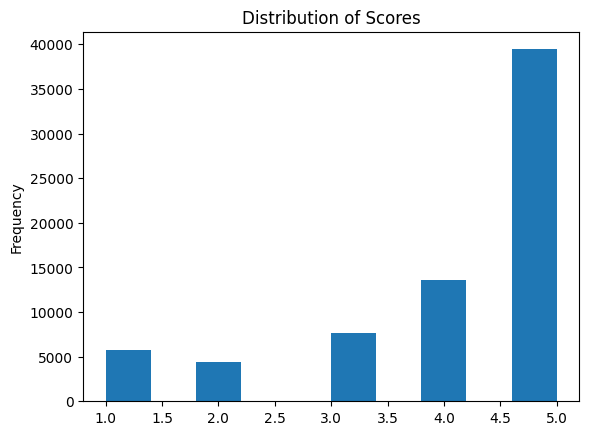

In [ ]:
reviews_df.Score.plot(kind = 'hist', title = 'Distribution of Scores')

plt.show()

**Score Distribution:**

*   Most reviews have a score of 5, indicating a strong positive sentiment.
*   Scores of 1 and 2 are significantly less frequent, but notable enough to indicate dissatisfaction.




In [ ]:
reviews_df['Text'] = reviews_df['Text'].apply(lambda x: re.sub(r'<.*?>', ' ', x))
reviews_df['Summary'] = reviews_df['Summary'].apply(lambda x: re.sub(r'<.*?>', ' ', x))

In [ ]:
def map_sentiment(score):
    if score in [1, 2]:
        return "negative"
    elif score == 3:
        return "neutral"
    elif score in [4, 5]:
        return "positive"

# Apply mapping to the 'Score' column
reviews_df['Sentiment'] = reviews_df['Score'].apply(map_sentiment)
reviews_df.drop('Score', axis=1, inplace=True)

In [ ]:
reviews_df.head()

,Summary,Text,Sentiment
Id,,,
423,Hard,"Great if you are cutting back on fat, they do ...",positive
424,Kettle potato chips: Fully loaded baked potato,I have never met a Kettle brand chip I did not...,positive
425,"Fresh, Lightly-Spiced, Crunchy Kettle Chips. G...",After buying bags one at a time (at a hefty ma...,positive
426,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b...",positive
427,"pretty good, could be better",Glad to find these in a one ounce size but the...,positive


## 🛠️ **Model:**

### 🛠️ **Dataset Preprocessing:**

In this stage, we clean and preprocess the text data to prepare it for modeling.  
This includes removing noise (such as stopwords, punctuation, numbers, and HTML tags), lemmatizing the text, and combining the 'Summary' and 'Text' fields.  
Effective preprocessing is essential for improving the model’s ability to learn meaningful patterns from the data.


#### Text Preprocessing with spaCy

We preprocess both the 'Summary' and 'Text' columns using spaCy. This includes removing stopwords, punctuation, numbers, and applying lemmatization to reduce each word to its base form. This step is essential for reducing noise and improving the quality of our input data.


In [ ]:
nlp = spacy.load("en_core_web_sm")

# remove stopwords
# remove Punctuation
# lemmatization
# remove numbers and extra spaces

def text_preprocess(sentence):
  return " ".join([token.lemma_.lower() for token in nlp(sentence, disable=["ner", "parser"])
  if not token.is_stop and
    not token.is_punct and
    not token.is_digit])


reviews_df['Summary'] = reviews_df['Summary'].apply(text_preprocess)
reviews_df['Text'] = reviews_df['Text'].apply(text_preprocess)

#### Device Selection

We check for GPU availability and use it if possible to accelerate model training.


In [ ]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


#### Creating a Custom Dataset Class

We define a custom `SentimentDataset` class to efficiently process and batch our text data for BERT. This class handles tokenization, attention masks, and label conversion.


In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0).to(device),
            'attention_mask': encoding['attention_mask'].squeeze(0).to(device),
            'label': torch.tensor(self.labels[idx], dtype=torch.long).to(device)
        }

#### Label Encoding and Train-Test Split

Sentiment labels are encoded as integers. The data is then split into training and test sets to evaluate model performance effectively.


In [ ]:
label_encoder = LabelEncoder()

texts = (reviews_df['Text'] + " [SEP] " + reviews_df['Summary']).tolist()
labels = label_encoder.fit_transform(reviews_df['Sentiment'])
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, stratify=labels)

#### Model Choice: Why BERT?

For this project, we chose to use a pre-trained BERT (Bidirectional Encoder Representations from Transformers) model for sequence classification.  
BERT has demonstrated state-of-the-art performance on a wide range of natural language processing tasks, especially those involving sentiment analysis.

Key reasons for choosing BERT:
- **Contextual Understanding:** Unlike traditional models, BERT understands the context of each word in a sentence by looking at both its left and right surroundings, which is crucial for nuanced sentiment classification.
- **Transfer Learning:** By using a pre-trained model, we leverage knowledge gained from a massive corpus, improving performance even with limited task-specific data.
- **Proven Results:** BERT-based models consistently outperform classical machine learning approaches like logistic regression or SVMs, especially for text classification.

Given these advantages, BERT is an excellent fit for our sentiment analysis task.


#### Initializing BERT Model and DataLoaders

We load a pre-trained BERT model and tokenizer for sequence classification. The train and test datasets are wrapped with PyTorch DataLoaders for efficient batching during training and evaluation.


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-cased', num_labels=len(label_encoder.classes_)).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, max_len=256)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer, max_len=256)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

#### Model Training

We train the BERT model for a set number of epochs using cross-entropy loss and the AdamW optimizer. Training loss is tracked and displayed for each epoch.


In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

#### Model Training Loop

The model is trained for 10 epochs. In each epoch, we iterate through the training batches, perform a forward and backward pass, and update the model weights using the AdamW optimizer. Training loss is averaged and displayed for each epoch to monitor convergence.


In [ ]:
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].long().to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Training Loss: {avg_train_loss:.4f}")

Epoch 1, Training Loss: 0.4505
Epoch 2, Training Loss: 0.3437
Epoch 3, Training Loss: 0.2622
Epoch 4, Training Loss: 0.1880
Epoch 5, Training Loss: 0.1277
Epoch 6, Training Loss: 0.0863
Epoch 7, Training Loss: 0.0664
Epoch 8, Training Loss: 0.0539
Epoch 9, Training Loss: 0.0463
Epoch 10, Training Loss: 0.0398


### 🛠️ **Model Evaluation :**

In this section, we evaluate the performance of our trained model on both the training and test sets.  
We use standard classification metrics to assess how well the model distinguishes between sentiment classes.


In [ ]:
def evaluate_model(dataloader, dataset_name):
    preds, true_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
            labels = labels.cpu().numpy()

            preds.extend(predictions)
            true_labels.extend(labels)

    # Convert lists to numpy arrays
    preds = np.array(preds)
    true_labels = np.array(true_labels)

    # Compute Metrics
    accuracy = accuracy_score(true_labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, preds, average="weighted")
    conf_matrix = confusion_matrix(true_labels, preds)

    # Print Metrics with Class Names
    print(f"{dataset_name} Set Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

## Baseline Comparison

To evaluate the added value of our BERT-based model, we compare its performance to a simple baseline classifier.  
As a baseline, we use the **majority class predictor**, which always predicts the most common sentiment label in the training set.

After applying this baseline to the test set, we measure accuracy and F1-score.  
Our expectation is that the BERT model will significantly outperform this naive approach.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

most_common = pd.Series(train_labels).mode()[0]
baseline_preds = [most_common] * len(test_labels)
baseline_acc = accuracy_score(test_labels, baseline_preds)
baseline_f1 = f1_score(test_labels, baseline_preds, average='weighted')

print("Majority Class Baseline Results:")
print(f"Accuracy: {baseline_acc:.4f}")
print(f"F1-Score: {baseline_f1:.4f}")


Majority Class Baseline Results:
Accuracy: 0.7491
F1-Score: 0.6417


#### Evaluation Metrics

We define a function to evaluate the model’s predictions using accuracy, precision, recall, F1-score, and the confusion matrix.  
These metrics provide a comprehensive view of the model’s effectiveness and its ability to generalize to unseen data.


In [ ]:
evaluate_model(train_loader, dataset_name="Train")

Train Set Metrics:
Accuracy: 0.9891
Precision: 0.9893
Recall: 0.9891
F1-Score: 0.9891
Confusion Matrix:
[[ 8075    13    17]
 [  261  5702   135]
 [  102    89 42219]]


In [ ]:
evaluate_model(test_loader, dataset_name="Test")

Test Set Metrics:
Accuracy: 0.8421
Precision: 0.8332
Recall: 0.8421
F1-Score: 0.8360
Confusion Matrix:
[[1524  227  275]
 [ 402  513  610]
 [ 369  352 9882]]


## Challenges

During this project, I encountered several challenges:

1. **Data Imbalance:**  
   The dataset was highly imbalanced, with a majority of reviews labeled as "positive."  
    Solution: I used stratified splitting to ensure that both the train and test sets maintained the original class distribution, which helped the model learn minority classes more effectively.

2. **Long Training Times:**  
   Training the BERT model was computationally intensive and time-consuming, especially with limited hardware resources.  
    Solution: I utilized GPU acceleration when available and optimized batch sizes and maximum sequence lengths to balance training speed and model performance.


## Future Improvements

1. **Hyperparameter Tuning:**  
   Experiment with different learning rates, batch sizes, and model architectures to further optimize model performance.

2. **Advanced Preprocessing:**  
   Incorporate additional text preprocessing techniques, such as handling negations, emoji sentiment, or domain-specific stopwords, to capture sentiment more accurately.

*Other potential improvements could include ensembling multiple models or applying data augmentation strategies for further robustness.*
